In [3]:
#Import des données


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings


warnings.filterwarnings('ignore')


# Configuration visuelle cohérente
plt.style.use('dark_background')
sns.set_palette("husl")


# Couleurs du thème cinéma
COLORS = {
   'primary': '#E50914',      # Rouge
   'secondary': '#D4AF37',    # Or
   'success': '#00C853',      # Vert
   'danger': '#E50914',       # Rouge
   'neutral': '#1E88E5',      # Bleu
   'background': '#141414',   # Noir
}


plt.rcParams.update({
   'figure.figsize': (14, 6),
   'figure.facecolor': '#141414',
   'axes.facecolor': '#1a1a1a',
   'font.size': 11,
   'axes.labelsize': 12,
   'axes.titlesize': 14,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'legend.fontsize': 10,
   'figure.titlesize': 16
})


print("✅ Configuration chargée")


# Charger le dataset nettoyé
df = pd.read_csv('../data/processed/movies_clean.csv')
print(f"📊 Dataset chargé : {len(df):,} films")


✅ Configuration chargée
📊 Dataset chargé : 7,632 films


✅ Configuration chargée
📊 Dataset chargé : 7,632 films

CHAPITRE 2 : ANALYSE DE LA RENTABILITÉ

🍩 Graphique 2.1 : Donut rentabilité


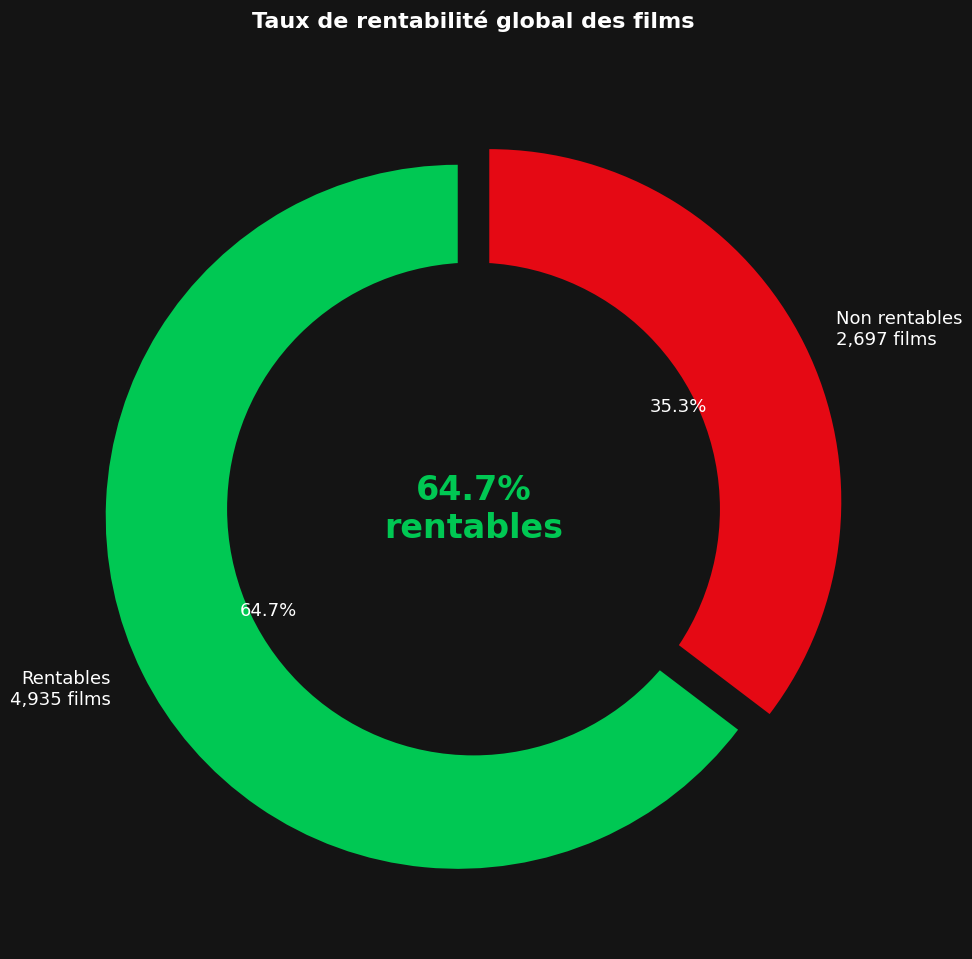

💾 Sauvegardé : chap2_01_profitability_rate.png

📊 Graphique 2.2 : Distribution du ROI


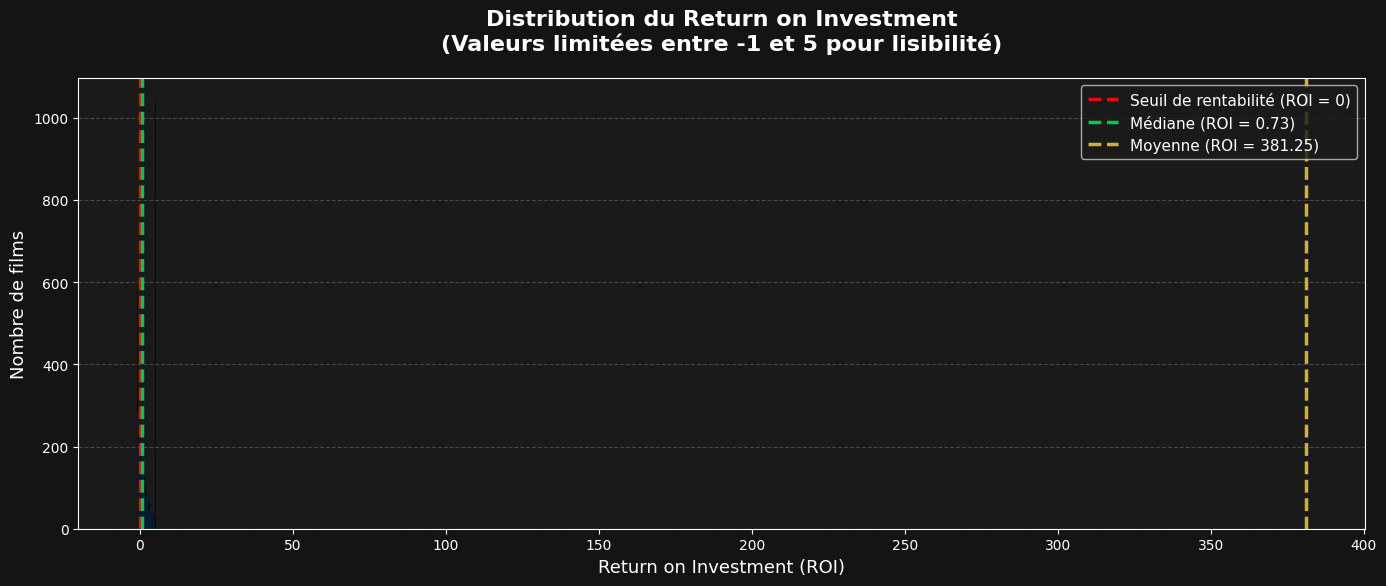

💾 Sauvegardé : chap2_02_roi_distribution.png

⏭️  Graphique 2.3 (Budget vs Revenue scatter) sera créé en interactif (Plotly)

💵 Graphique 2.4 : ROI par catégorie de budget


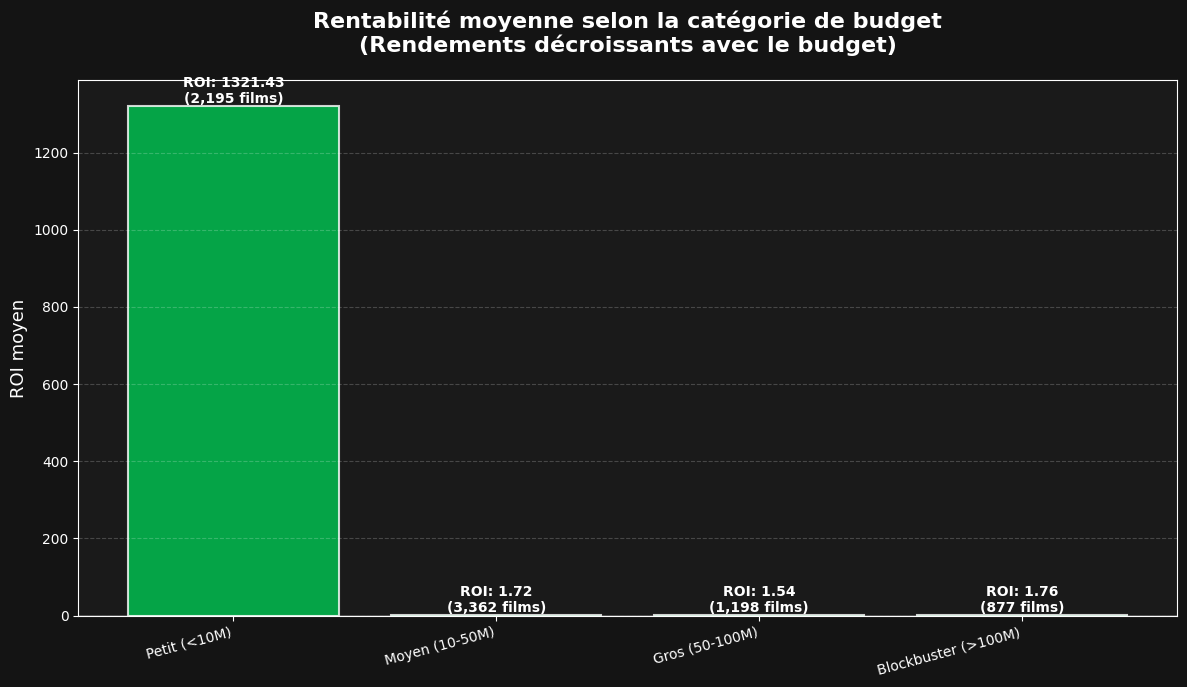

💾 Sauvegardé : chap2_04_budget_roi_relation.png

📈 Graphique 2.5 : ROI par décennie


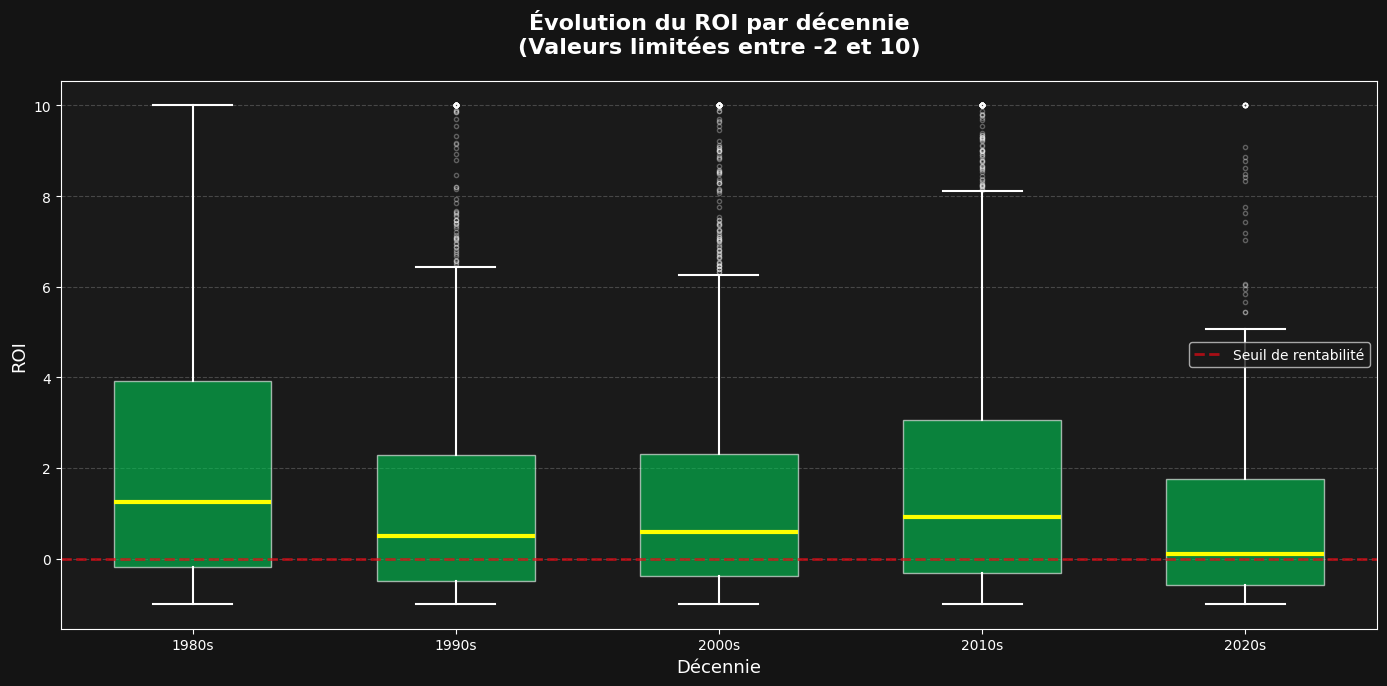

💾 Sauvegardé : chap2_05_profitability_evolution.png

✅ CHAPITRE 2 TERMINÉ : 4 graphiques statiques créés (+ 1 interactif à venir)

📁 Fichiers sauvegardés :
   - chap2_01_profitability_rate.png
   - chap2_02_roi_distribution.png
   - chap2_04_budget_roi_relation.png
   - chap2_05_profitability_evolution.png


In [5]:
"""
================================================================================
CHAPITRE 2 : ANALYSE DE LA RENTABILITÉ
================================================================================
4 graphiques statiques : Donut, Distribution ROI, Budget-ROI, Évolution
"""

# ==============================================================================
# IMPORTS ET CONFIGURATION
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuration visuelle - Thème cinéma
plt.style.use('dark_background')
sns.set_palette("husl")

COLORS = {
    'primary': '#E50914',
    'secondary': '#D4AF37',
    'success': '#00C853',
    'danger': '#E50914',
    'neutral': '#1E88E5',
    'background': '#141414',
}

plt.rcParams.update({
    'figure.figsize': (14, 6),
    'figure.facecolor': '#141414',
    'axes.facecolor': '#1a1a1a',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

print("✅ Configuration chargée")

# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================

df = pd.read_csv('../data/processed/movies_clean.csv')
os.makedirs('../outputs/figures', exist_ok=True)

print(f"📊 Dataset chargé : {len(df):,} films")

print("\n" + "="*80)
print("CHAPITRE 2 : ANALYSE DE LA RENTABILITÉ")
print("="*80)

# ==============================================================================
# GRAPHIQUE 2.1 : TAUX DE RENTABILITÉ GLOBAL (DONUT)
# ==============================================================================

print("\n🍩 Graphique 2.1 : Donut rentabilité")

fig, ax = plt.subplots(figsize=(10, 10))

profitable_count = df['is_profitable'].sum()
non_profitable_count = len(df) - profitable_count

sizes = [profitable_count, non_profitable_count]
labels = [f'Rentables\n{profitable_count:,} films', 
          f'Non rentables\n{non_profitable_count:,} films']
colors = [COLORS['success'], COLORS['danger']]
explode = (0.05, 0.05)

wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors,
                                    autopct='%1.1f%%', startangle=90,
                                    explode=explode, textprops={'fontsize': 13})

# Créer le donut
centre_circle = plt.Circle((0, 0), 0.70, fc='#141414')
ax.add_artist(centre_circle)

# Texte au centre
ax.text(0, 0, f'{(profitable_count/len(df)*100):.1f}%\nrentables', 
        ha='center', va='center', fontsize=24, fontweight='bold',
        color=COLORS['success'])

ax.set_title('Taux de rentabilité global des films', 
             fontsize=16, fontweight='bold', pad=30)

plt.tight_layout()
plt.savefig('../outputs/figures/chap2_01_profitability_rate.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap2_01_profitability_rate.png")

# ==============================================================================
# GRAPHIQUE 2.2 : DISTRIBUTION DU ROI
# ==============================================================================

print("\n📊 Graphique 2.2 : Distribution du ROI")

fig, ax = plt.subplots(figsize=(14, 6))

# Clipper le ROI pour lisibilité
roi_clipped = df['roi'].clip(-1, 5)

ax.hist(roi_clipped, bins=60, edgecolor='black', 
        color=COLORS['neutral'], alpha=0.7, linewidth=0.5)

# Lignes de référence
ax.axvline(x=0, color=COLORS['danger'], linestyle='--', 
           linewidth=2.5, label='Seuil de rentabilité (ROI = 0)')
ax.axvline(x=df['roi'].median(), color=COLORS['success'], 
           linestyle='--', linewidth=2.5, 
           label=f'Médiane (ROI = {df["roi"].median():.2f})')
ax.axvline(x=df['roi'].mean(), color=COLORS['secondary'], 
           linestyle='--', linewidth=2.5, 
           label=f'Moyenne (ROI = {df["roi"].mean():.2f})')

ax.set_xlabel('Return on Investment (ROI)', fontsize=13)
ax.set_ylabel('Nombre de films', fontsize=13)
ax.set_title('Distribution du Return on Investment\n(Valeurs limitées entre -1 et 5 pour lisibilité)', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.savefig('../outputs/figures/chap2_02_roi_distribution.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap2_02_roi_distribution.png")

# ==============================================================================
# NOTE : GRAPHIQUE 2.3 (SCATTER) SERA FAIT EN PLOTLY INTERACTIF
# ==============================================================================

print("\n⏭️  Graphique 2.3 (Budget vs Revenue scatter) sera créé en interactif (Plotly)")

# ==============================================================================
# GRAPHIQUE 2.4 : RELATION BUDGET-ROI
# ==============================================================================

print("\n💵 Graphique 2.4 : ROI par catégorie de budget")

fig, ax = plt.subplots(figsize=(12, 7))

budget_roi = df.groupby('budget_category').agg({
    'roi': 'mean',
    'title': 'count'
}).reset_index()

# Ordre logique des catégories
category_order = ['Petit (<10M)', 'Moyen (10-50M)', 
                  'Gros (50-100M)', 'Blockbuster (>100M)']
budget_roi['budget_category'] = pd.Categorical(
    budget_roi['budget_category'], 
    categories=category_order, 
    ordered=True
)
budget_roi = budget_roi.sort_values('budget_category')

colors_bars = [COLORS['success'] if roi > 0 else COLORS['danger'] 
               for roi in budget_roi['roi']]

bars = ax.bar(range(len(budget_roi)), budget_roi['roi'], 
              color=colors_bars, edgecolor='white', linewidth=1.5, alpha=0.8)

ax.set_xticks(range(len(budget_roi)))
ax.set_xticklabels(budget_roi['budget_category'], rotation=15, ha='right')
ax.set_ylabel('ROI moyen', fontsize=13)
ax.set_title('Rentabilité moyenne selon la catégorie de budget\n(Rendements décroissants avec le budget)', 
             fontsize=16, fontweight='bold', pad=20)
ax.axhline(y=0, color='white', linestyle='-', linewidth=1)
ax.grid(axis='y', alpha=0.2, linestyle='--')

# Ajouter valeurs et comptage
for i, (roi, count) in enumerate(zip(budget_roi['roi'], budget_roi['title'])):
    ax.text(i, roi + 0.1 if roi > 0 else roi - 0.1, 
            f'ROI: {roi:.2f}\n({count:,} films)', 
            ha='center', va='bottom' if roi > 0 else 'top', 
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/chap2_04_budget_roi_relation.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap2_04_budget_roi_relation.png")

# ==============================================================================
# GRAPHIQUE 2.5 : ÉVOLUTION DE LA RENTABILITÉ
# ==============================================================================

print("\n📈 Graphique 2.5 : ROI par décennie")

fig, ax = plt.subplots(figsize=(14, 7))

decades = sorted(df['decade'].unique())
roi_by_decade = [df[df['decade'] == d]['roi'].clip(-2, 10) for d in decades]

bp = ax.boxplot(roi_by_decade, 
                labels=[f"{int(d)}s" for d in decades],
                patch_artist=True,
                widths=0.6,
                showfliers=True)

# Colorer selon la médiane
medians = [np.median(data) for data in roi_by_decade]
for patch, median in zip(bp['boxes'], medians):
    color = COLORS['success'] if median > 0 else COLORS['danger']
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

for whisker in bp['whiskers']:
    whisker.set(color='white', linewidth=1.5)

for cap in bp['caps']:
    cap.set(color='white', linewidth=1.5)

for median in bp['medians']:
    median.set(color='yellow', linewidth=3)

for flier in bp['fliers']:
    flier.set(marker='o', alpha=0.3, markersize=3)

ax.axhline(y=0, color=COLORS['danger'], linestyle='--', 
           linewidth=2, alpha=0.7, label='Seuil de rentabilité')

ax.set_title('Évolution du ROI par décennie\n(Valeurs limitées entre -2 et 10)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Décennie', fontsize=13)
ax.set_ylabel('ROI', fontsize=13)
ax.legend()
ax.grid(axis='y', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.savefig('../outputs/figures/chap2_05_profitability_evolution.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap2_05_profitability_evolution.png")

# ==============================================================================
# RÉSUMÉ
# ==============================================================================

print("\n" + "="*80)
print("✅ CHAPITRE 2 TERMINÉ : 4 graphiques statiques créés (+ 1 interactif à venir)")
print("="*80)
print("\n📁 Fichiers sauvegardés :")
print("   - chap2_01_profitability_rate.png")
print("   - chap2_02_roi_distribution.png")
print("   - chap2_04_budget_roi_relation.png")
print("   - chap2_05_profitability_evolution.png")


✅ Configuration chargée
📊 Dataset chargé : 7,632 films

CHAPITRE 3 : FACTEURS DE SUCCÈS

🎭 Graphique 3.1 : ROI moyen par genre


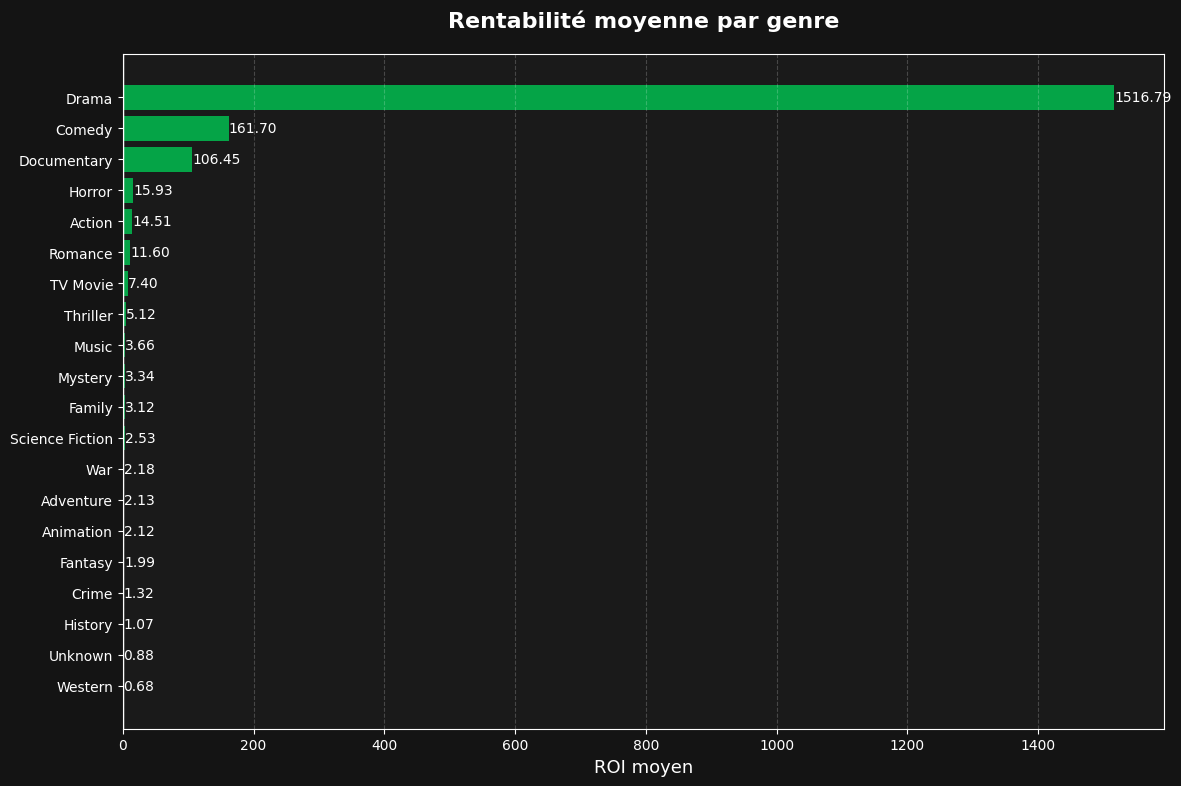

💾 Sauvegardé : chap3_01_roi_by_genre.png

💰 Graphique 3.2 : Budget et Revenue par genre


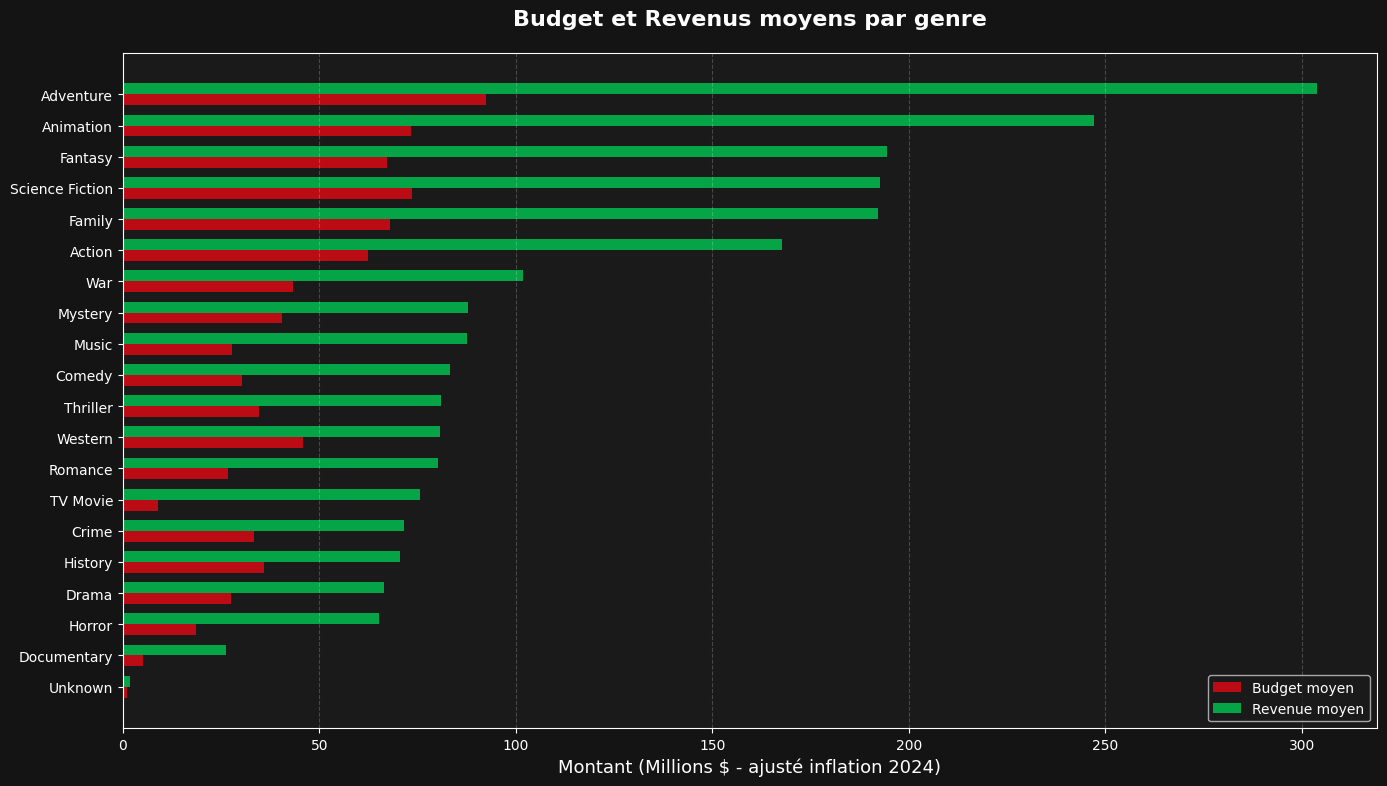

💾 Sauvegardé : chap3_02_budget_revenue_by_genre.png

📊 Graphique 3.3 : Volume par genre


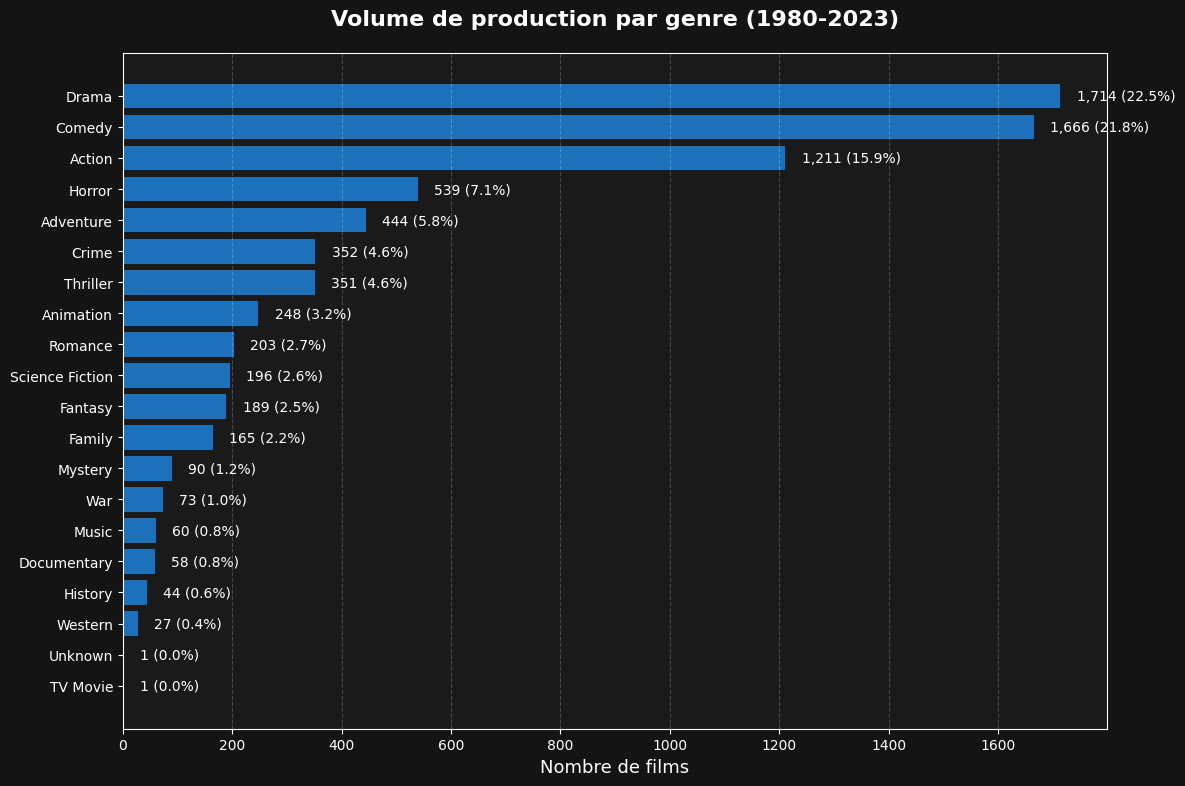

💾 Sauvegardé : chap3_03_volume_by_genre.png

🗓️ Graphique 3.4 : Saisonnalité


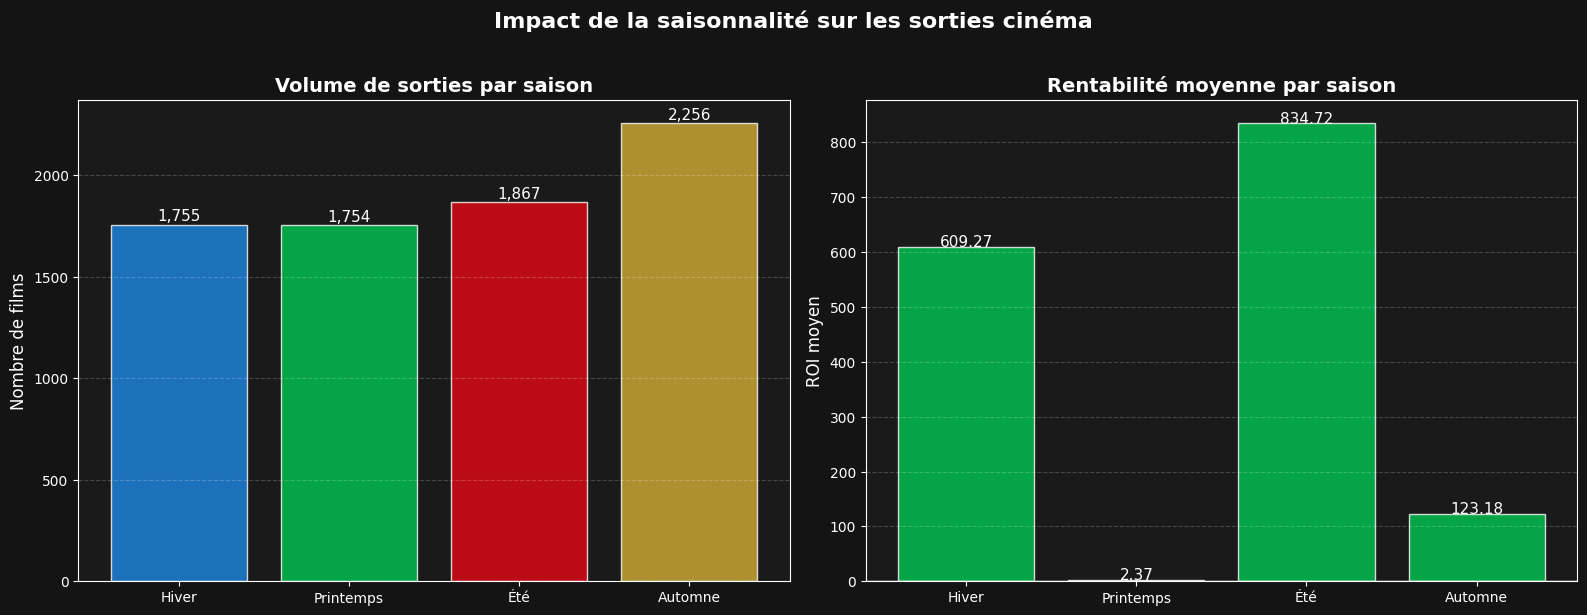

💾 Sauvegardé : chap3_04_seasonality.png


In [6]:
"""
================================================================================
CHAPITRE 3 : FACTEURS DE SUCCÈS
================================================================================
7 graphiques statiques : Genres, Saisonnalité, Popularité, Notes, Corrélation
"""

# ==============================================================================
# IMPORTS ET CONFIGURATION
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from datetime import datetime

warnings.filterwarnings('ignore')

# Configuration visuelle - Thème cinéma
plt.style.use('dark_background')
sns.set_palette("husl")

COLORS = {
    'primary': '#E50914',
    'secondary': '#D4AF37',
    'success': '#00C853',
    'danger': '#E50914',
    'neutral': '#1E88E5',
    'background': '#141414',
}

plt.rcParams.update({
    'figure.figsize': (14, 6),
    'figure.facecolor': '#141414',
    'axes.facecolor': '#1a1a1a',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

print("✅ Configuration chargée")

# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================

df = pd.read_csv('../data/processed/movies_clean.csv')
os.makedirs('../outputs/figures', exist_ok=True)

print(f"📊 Dataset chargé : {len(df):,} films")

print("\n" + "="*80)
print("CHAPITRE 3 : FACTEURS DE SUCCÈS")
print("="*80)

# ==============================================================================
# GRAPHIQUE 3.1 : ROI PAR GENRE
# ==============================================================================

print("\n🎭 Graphique 3.1 : ROI moyen par genre")

fig, ax = plt.subplots(figsize=(12, 8))

genre_roi = df.groupby('main_genre')['roi'].mean().sort_values(ascending=True)
colors_genre = [COLORS['success'] if x > 0 else COLORS['danger'] for x in genre_roi.values]

bars = ax.barh(range(len(genre_roi)), genre_roi.values, color=colors_genre, alpha=0.8)

ax.set_yticks(range(len(genre_roi)))
ax.set_yticklabels(genre_roi.index)
ax.set_xlabel('ROI moyen', fontsize=13)
ax.set_title('Rentabilité moyenne par genre', 
             fontsize=16, fontweight='bold', pad=20)
ax.axvline(x=0, color='white', linestyle='-', linewidth=1)
ax.grid(axis='x', alpha=0.2, linestyle='--')

# Ajouter valeurs
for i, val in enumerate(genre_roi.values):
    ax.text(val + 0.05 if val > 0 else val - 0.05, i, f'{val:.2f}', 
            va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_01_roi_by_genre.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_01_roi_by_genre.png")

# ==============================================================================
# GRAPHIQUE 3.2 : BUDGET ET REVENUE PAR GENRE
# ==============================================================================

print("\n💰 Graphique 3.2 : Budget et Revenue par genre")

fig, ax = plt.subplots(figsize=(14, 8))

genre_finance = df.groupby('main_genre').agg({
    'budget_million': 'mean',
    'revenue_million': 'mean'
}).sort_values('revenue_million', ascending=True)

x = np.arange(len(genre_finance))
width = 0.35

bars1 = ax.barh(x - width/2, genre_finance['budget_million'], width,
                label='Budget moyen', color=COLORS['danger'], alpha=0.8)
bars2 = ax.barh(x + width/2, genre_finance['revenue_million'], width,
                label='Revenue moyen', color=COLORS['success'], alpha=0.8)

ax.set_yticks(x)
ax.set_yticklabels(genre_finance.index)
ax.set_xlabel('Montant (Millions $ - ajusté inflation 2024)', fontsize=13)
ax.set_title('Budget et Revenus moyens par genre', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend()
ax.grid(axis='x', alpha=0.2, linestyle='--')

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_02_budget_revenue_by_genre.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_02_budget_revenue_by_genre.png")

# ==============================================================================
# GRAPHIQUE 3.3 : VOLUME DE PRODUCTION PAR GENRE
# ==============================================================================

print("\n📊 Graphique 3.3 : Volume par genre")

fig, ax = plt.subplots(figsize=(12, 8))

genre_counts = df['main_genre'].value_counts().sort_values(ascending=True)

bars = ax.barh(range(len(genre_counts)), genre_counts.values, 
               color=COLORS['neutral'], alpha=0.8)

ax.set_yticks(range(len(genre_counts)))
ax.set_yticklabels(genre_counts.index)
ax.set_xlabel('Nombre de films', fontsize=13)
ax.set_title('Volume de production par genre (1980-2023)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.2, linestyle='--')

# Ajouter valeurs et pourcentages
for i, val in enumerate(genre_counts.values):
    pct = (val / len(df)) * 100
    ax.text(val + 30, i, f'{val:,} ({pct:.1f}%)', 
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/chap3_03_volume_by_genre.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_03_volume_by_genre.png")

# ==============================================================================
# GRAPHIQUE 3.4 : SAISONNALITÉ
# ==============================================================================

print("\n🗓️ Graphique 3.4 : Saisonnalité")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sous-graphique 1 : Volume de sorties par saison
season_order = ['Hiver', 'Printemps', 'Été', 'Automne']
season_counts = df['season'].value_counts()[season_order]

ax1.bar(range(len(season_counts)), season_counts.values, 
        color=[COLORS['neutral'], COLORS['success'], COLORS['primary'], COLORS['secondary']],
        alpha=0.8, edgecolor='white', linewidth=1)
ax1.set_xticks(range(len(season_counts)))
ax1.set_xticklabels(season_order)
ax1.set_ylabel('Nombre de films', fontsize=12)
ax1.set_title('Volume de sorties par saison', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.2, linestyle='--')

for i, val in enumerate(season_counts.values):
    ax1.text(i, val + 20, f'{val:,}', ha='center', fontsize=11)

# Sous-graphique 2 : ROI moyen par saison
season_roi = df.groupby('season')['roi'].mean()[season_order]
colors_roi = [COLORS['success'] if x > 0 else COLORS['danger'] for x in season_roi.values]

ax2.bar(range(len(season_roi)), season_roi.values, 
        color=colors_roi, alpha=0.8, edgecolor='white', linewidth=1)
ax2.set_xticks(range(len(season_roi)))
ax2.set_xticklabels(season_order)
ax2.set_ylabel('ROI moyen', fontsize=12)
ax2.set_title('Rentabilité moyenne par saison', fontsize=14, fontweight='bold')
ax2.axhline(y=0, color='white', linestyle='-', linewidth=1)
ax2.grid(axis='y', alpha=0.2, linestyle='--')

for i, val in enumerate(season_roi.values):
    ax2.text(i, val + 0.05 if val > 0 else val - 0.05, f'{val:.2f}', 
             ha='center', fontsize=11)

plt.suptitle('Impact de la saisonnalité sur les sorties cinéma', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/chap3_04_seasonality.png', 
            dpi=300, bbox_inches='tight', facecolor='#141414')
plt.show()

print("💾 Sauvegardé : chap3_04_seasonality.png")